
# Spotify Songs Dataset – Exploratory Data Analysis


 The Spotify Songs Dataset contains information about thousands of tracks available on Spotify. 
Each song includes details such as its name, artists, genre, popularity score, duration, and 
whether the song is explicit or not. This dataset helps us understand trends in modern music 
and the characteristics of popular songs.


### what is this dataset about?
this dataset focuses on general songs meta data such as 
- Song name
- Artist name
- Genre
- Popularity score(0–100)
- Song duration(in milliseconds)
- Explicit or non-explicit content

It does not include audio features like tempo or energy, so the analysis is based on metadata only.

### What questions are we trying to answer?
Through this analysis, we want to explore:
1. Which genres are most common?
2. Which genres have the highest average popularity?
3. Which artists appear most frequently?
4. What are the top 10 most popular songs?
5. Are explicit songs more popular than non-explicit ones?
6. What is the typical song duration?
7. Does song duration affect popularity in any way?


### Why analyze Spotify data?
Spotify is one of the largest music streaming platforms in the world.  
Analyzing Spotify data helps us understand:
- Music trends
- What makes a song popular
- Listener preferences
- How genres and artists perform
- Patterns in explicit vs non-explicit content

These insights are valuable for data analysts because they show how to work with real-world datasets, identify trends, and communicate findings using visualizations.

### Importing Libraries

To begin the analysis, we import the necessary Python libraries. These libraries help with 
data loading, cleaning, manipulation, and visualization.

- **pandas** -> for reading and working with the dataset  
- **numpy** -> for numerical operations  
- **matplotlib.pyplot** -> for creating basic plots  
- **seaborn** -> for statistical visualizations  
- **plotly.express** -> for interactive charts  

These tools together allow us to perform Exploratory Data Analysis (EDA) in a structured and visual manner.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(style="whitegrid")
%matplotlib inline


## 📥 Loading the Dataset

In this step, we load the Spotify dataset into a pandas DataFrame so that we can start exploring 
and analyzing it. A DataFrame allows us to view, manipulate, and understand the structure of the data easily.

We use the `read_csv()` function from pandas to import the dataset.


In [5]:
df = pd.read_csv("spotify_tracks[1].csv")
df.head()


,id,name,genre,artists,album,popularity,duration_ms,explicit
0,7kr3xZk4yb3YSZ4VFtg2Qt,Acoustic,acoustic,Billy Raffoul,1975,58,172199,False
1,1kJygfS4eoVziBBI93MSYp,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,172202,False
2,6lynns69p4zTCRxmmiSY1x,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,144786,False
3,1RC9slv335IfLce5vt9KTW,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,116573,False
4,5o9L8xBuILoVjLECSBi7Vo,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33,133922,False


## 🔍 Dataset Overview

In this section, we take a closer look at the structure of the dataset to understand what we are working with.

We will explore:
- How many rows and columns the dataset contains  
- The column names  
- The data types of each column  
- Whether there are missing values  
- Basic statistical summary of numerical fields  

This helps us understand the quality of the data before doing any analysis.


In [5]:
df.shape


(6300, 8)

In [7]:
df.columns

Index(['id', 'name', 'genre', 'artists', 'album', 'popularity', 'duration_ms',
       'explicit'],
      dtype='object')

In [8]:
df.info

<bound method DataFrame.info of                           id                                           name  \
0     7kr3xZk4yb3YSZ4VFtg2Qt                                       Acoustic   
1     1kJygfS4eoVziBBI93MSYp                                       Acoustic   
2     6lynns69p4zTCRxmmiSY1x                  Here Comes the Sun - Acoustic   
3     1RC9slv335IfLce5vt9KTW                                    Acoustic #3   
4     5o9L8xBuILoVjLECSBi7Vo  My Love Mine All Mine - Acoustic Instrumental   
...                      ...                                            ...   
6295  4uveHSzaz8YEbTF9j6QlCI                             Voyage to Atlantis   
6296  4u15cjyziW2Ewn5Ek3082l                                       L'Oiseau   
6297  56pHPaTeX2O9aVmTFYS8hV                                   The Daintree   
6298  6Ldyc5TsR4kaUsuHKcB2AD                         The Sorcerers Symphony   
6299  3ry0f8ybk8upUBIk8unvmF                                Fiore d'inverno   

            genre  

In [9]:
df.isnull().sum()



id             0
name           0
genre          0
artists        0
album          0
popularity     0
duration_ms    0
explicit       0
dtype: int64

In [10]:
df.describe()


,popularity,duration_ms
count,6300.000000,6.300000e+03
mean,30.754762,2.028477e+05
std,19.948991,1.210299e+05
min,0.000000,3.006000e+04
25%,16.000000,1.476870e+05
50%,29.000000,1.916070e+05
75%,45.000000,2.369625e+05
max,90.000000,3.601658e+06


## 🧹 Data Cleaning

Before performing any analysis, it is important to clean the dataset to ensure accuracy.  
In this step, we will:

- Remove duplicate rows  
- Check and handle missing values  
- Create new useful columns (e.g., converting duration from milliseconds to minutes)  

Cleaning helps improve the quality of insights and makes the dataset easier to analyze.


In [21]:
# Remove duplicate rows
df = df.drop_duplicates()

df.shape  # Check the updated shape


(6300, 9)

In [22]:
# Check again for any missing values before proceeding
df.isnull().sum()


id              0
name            0
genre           0
artists         0
album           0
popularity      0
duration_ms     0
explicit        0
duration_min    0
dtype: int64

In [23]:
# Convert duration from milliseconds to minutes
df['duration_min'] = df['duration_ms'] / (1000 * 60)

# Display the first few rows to confirm the new column
df[['duration_ms', 'duration_min']].head()


,duration_ms,duration_min
0,172199,2.869983
1,172202,2.870033
2,144786,2.413100
3,116573,1.942883
4,133922,2.232033


### ✔️ Summary of Cleaning

- All duplicate rows were removed  
- Missing values were checked  
- A new column `duration_min` was created for easier analysis  


## 🔎 Exploratory Data Analysis (EDA)

In this section, we explore different aspects of the dataset to understand patterns in popularity, genres, and artists.


### 📈 > Popularity Distribution

- What is the spread of popularity scores in the dataset?  
- Are most songs highly popular or not?


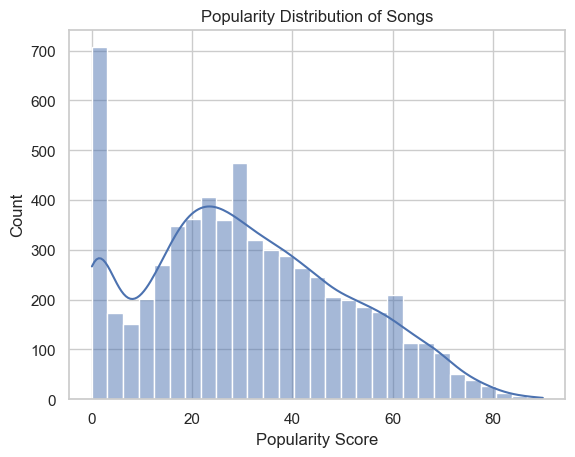

In [24]:
sns.histplot(df['popularity'], kde=True)
plt.title("Popularity Distribution of Songs")
plt.xlabel("Popularity Score")
plt.ylabel("Count")
plt.show()

### 🎼 > Genre Analysis

In this section, we examine:
- The most common genres in the dataset  
- Which genres have the highest average popularity  


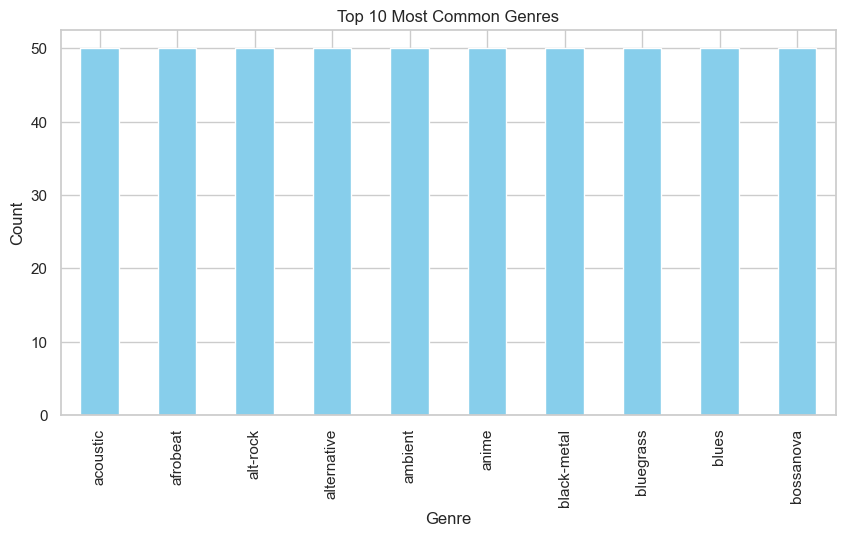

In [25]:
df['genre'].value_counts().head(10).plot(
    kind='bar', figsize=(10,5), color='skyblue'
)
plt.title("Top 10 Most Common Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()



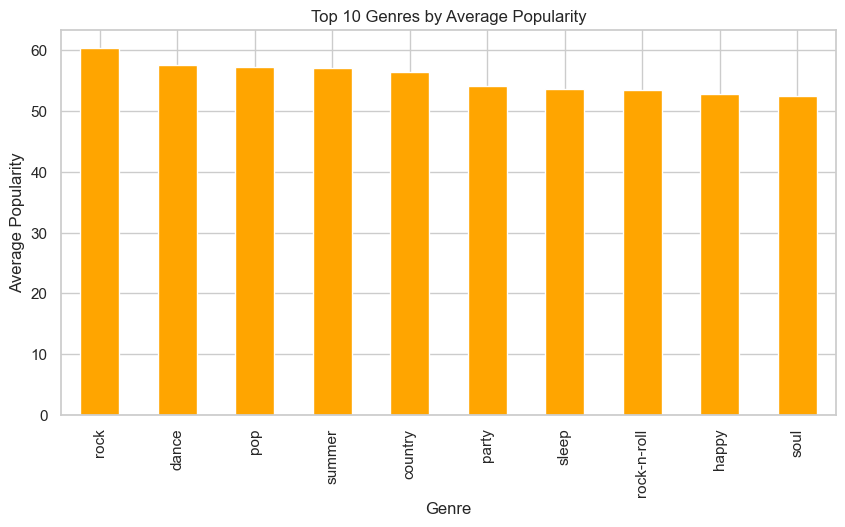

In [27]:
df.groupby('genre')['popularity'].mean().sort_values(ascending=False).head(10).plot(
    kind='bar', figsize=(10,5), color='orange'
)
plt.title("Top 10 Genres by Average Popularity")
plt.xlabel("Genre")
plt.ylabel("Average Popularity")
plt.show()


### 🎤 > Artist Analysis

Here we analyze:
- Which artists appear most frequently  
- Which artists have the highest average popularity  


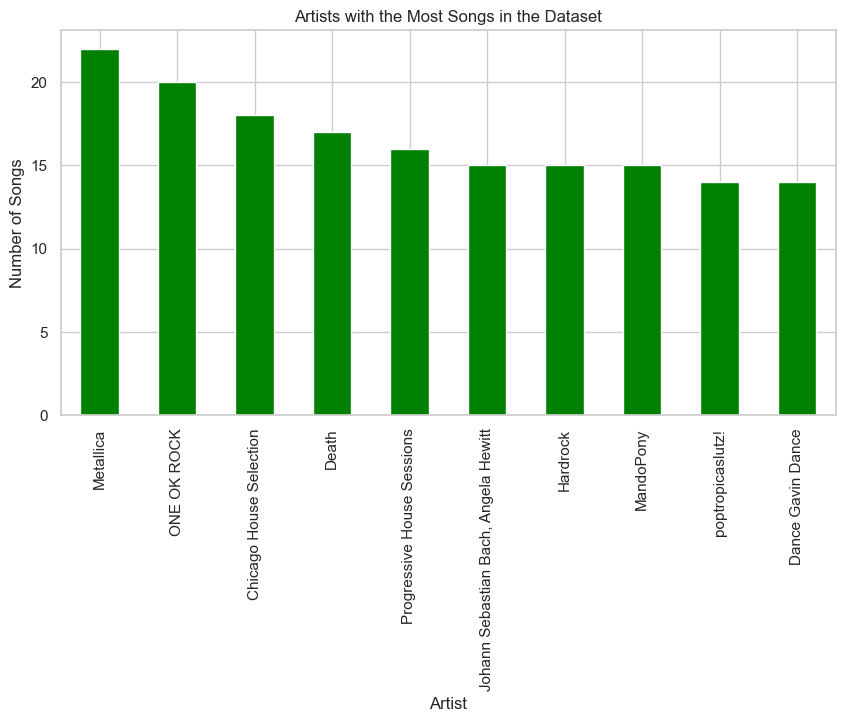

In [28]:
df['artists'].value_counts().head(10).plot(
    kind='bar', figsize=(10,5), color='green'
)
plt.title("Artists with the Most Songs in the Dataset")
plt.xlabel("Artist")
plt.ylabel("Number of Songs")
plt.show()


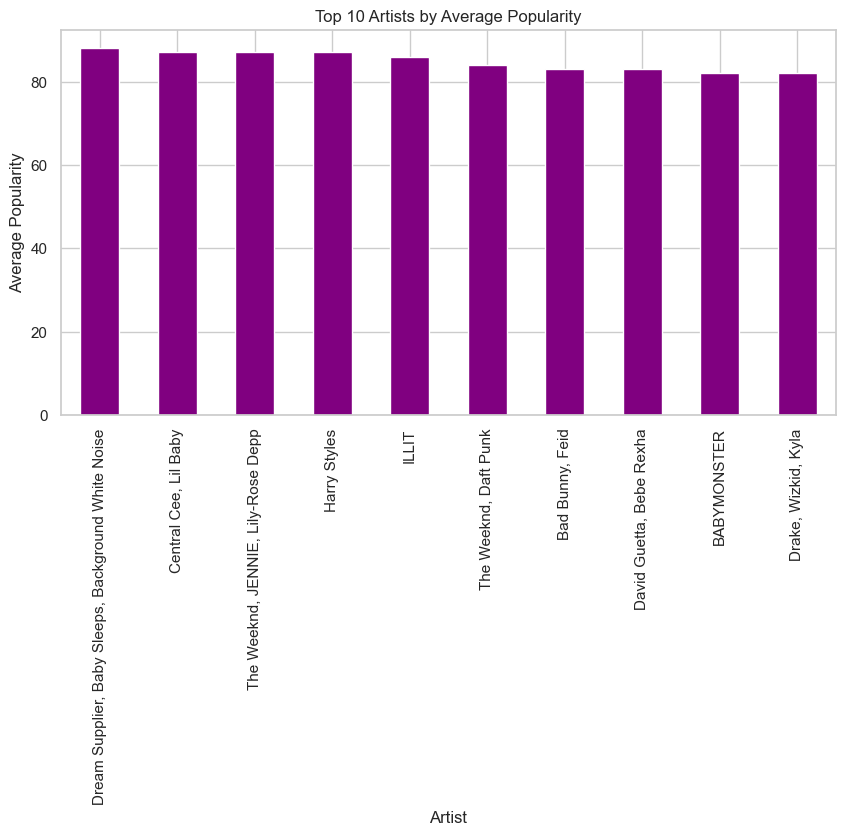

In [29]:
df.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(10).plot(
    kind='bar', figsize=(10,5), color='purple'
)
plt.title("Top 10 Artists by Average Popularity")
plt.xlabel("Artist")
plt.ylabel("Average Popularity")
plt.show()


### ⏱️ > Duration Analysis

In this section, we analyze:

- What is the average duration of songs in the dataset?
- How does song duration relate to popularity?


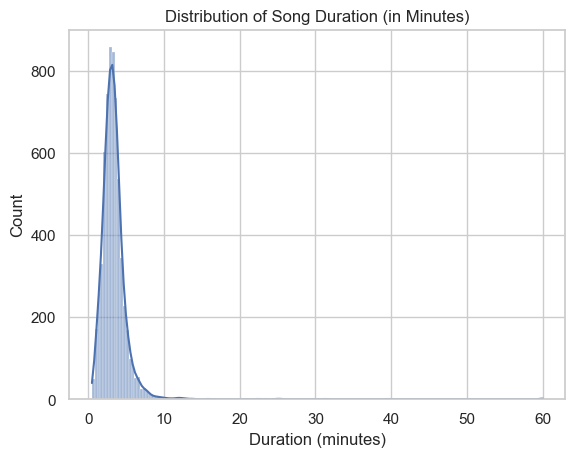

In [30]:
sns.histplot(df['duration_min'], kde=True)
plt.title("Distribution of Song Duration (in Minutes)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.show()



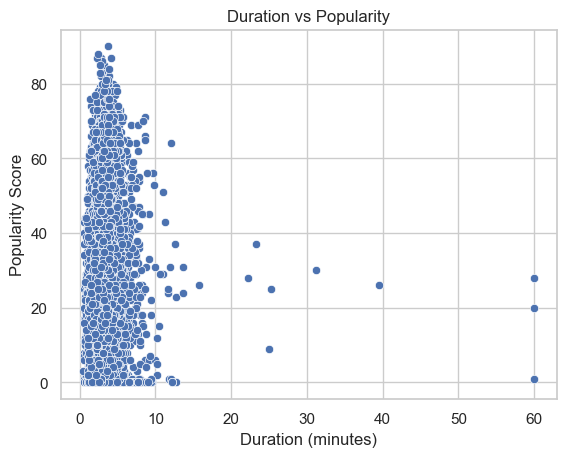

In [31]:
sns.scatterplot(data=df, x='duration_min', y='popularity')
plt.title("Duration vs Popularity")
plt.xlabel("Duration (minutes)")
plt.ylabel("Popularity Score")
plt.show()


### 🔞 > Explicit vs Non-Explicit Songs

Here we compare popularity between:

- Explicit songs  
- Non-explicit songs  

This tells us whether explicit content affects how popular a song becomes.


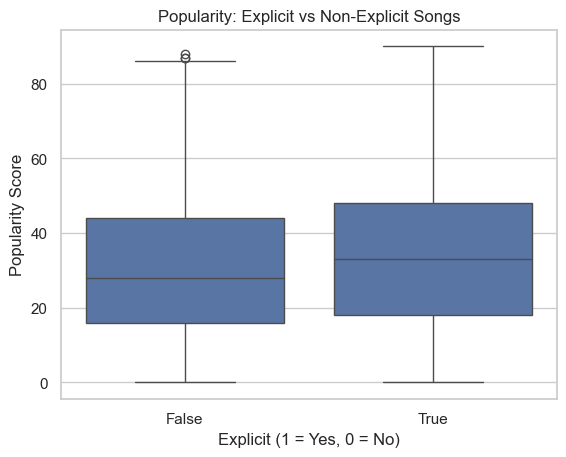

In [33]:
sns.boxplot(x='explicit', y='popularity', data=df)
plt.title("Popularity: Explicit vs Non-Explicit Songs")
plt.xlabel("Explicit (1 = Yes, 0 = No)")
plt.ylabel("Popularity Score")
plt.show()



### 🔗 > Correlation Analysis

Correlation helps us understand how numerical features relate to each other.

In this dataset, the numerical columns include:
- Popularity  
- Duration (ms)
- Duration (minutes)
- Explicit (treated as numerical)

A heatmap will show which features are strongly or weakly related.


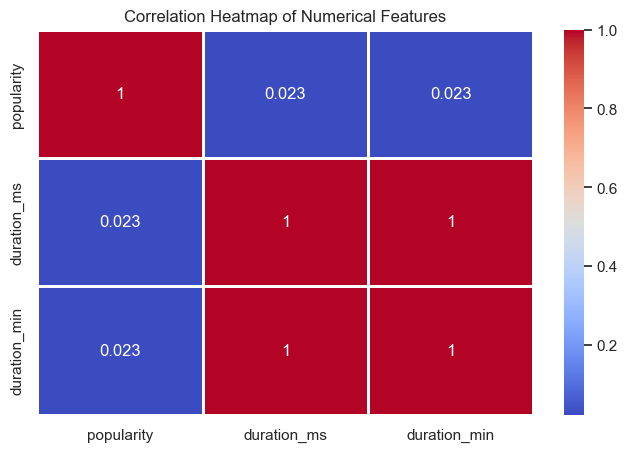

In [34]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8,5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=1)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


## 🎵  Top Songs Analysis

In this section, we identify the most popular songs in the dataset.

We aim to answer:
- ⭐ What are the top 10 most popular songs?
- 🎤 Which artists created the most popular tracks?

This helps us understand which artists dominate popularity and which songs perform the best.


In [35]:
top_songs = df.sort_values(by='popularity', ascending=False).head(10)
top_songs[['name', 'artists', 'genre', 'popularity']]




,name,artists,genre,popularity
1567,Houdini,Eminem,edm,90
5540,Clean Baby Sleep White Noise (Loopable),"Dream Supplier, Baby Sleeps, Background White ...",sleep,88
2797,As It Was,Harry Styles,house,87
3158,"One Of The Girls (with JENNIE, Lily Rose Depp)","The Weeknd, JENNIE, Lily-Rose Depp",j-idol,87
4746,BAND4BAND (feat. Lil Baby),"Central Cee, Lil Baby",r-n-b,87
3213,Magnetic,ILLIT,j-pop,86
3356,Magnetic,ILLIT,k-pop,86
4745,Beautiful Things,Benson Boone,r-n-b,86
4610,Pink Skies,Zach Bryan,punk,85
4748,Slow It Down,Benson Boone,r-n-b,85


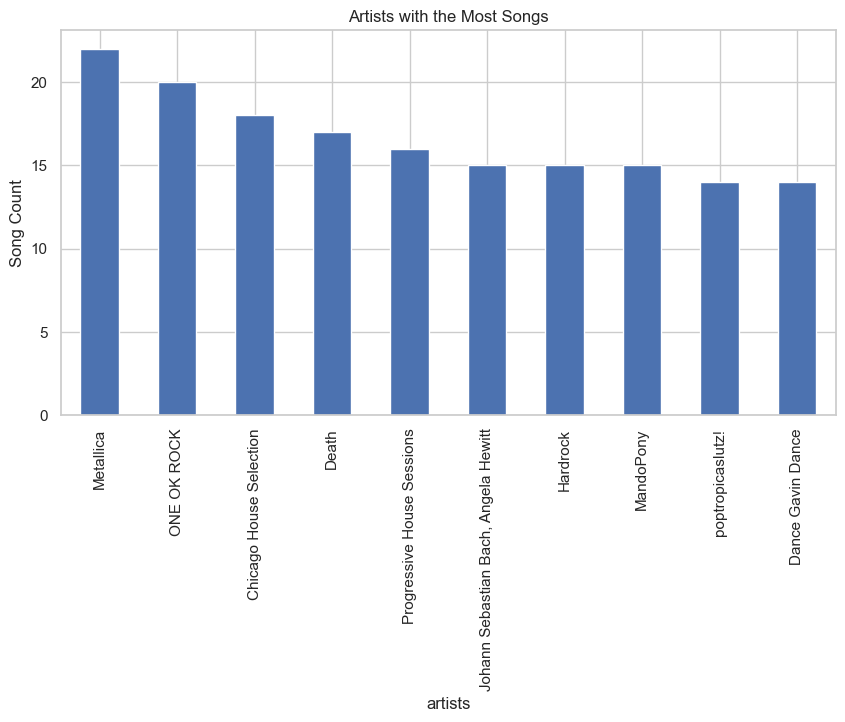

In [38]:
df['artists'].value_counts().head(10).plot(kind='bar', figsize=(10,5))
plt.title("Artists with the Most Songs")
plt.ylabel("Song Count")
plt.show()

### ✔️ Interpretation
From this table, we can observe:
- Which songs are the most popular  
- Which artists consistently appear at the top  `
- Whether certain genres dominate the top rankings  


In [37]:
top_songs['artists'].value_counts()


artists
Benson Boone                                           2
ILLIT                                                  2
Eminem                                                 1
Dream Supplier, Baby Sleeps, Background White Noise    1
The Weeknd, JENNIE, Lily-Rose Depp                     1
Harry Styles                                           1
Central Cee, Lil Baby                                  1
Zach Bryan                                             1
Name: count, dtype: int64

In [12]:
df['genre'].nunique()
df['artists'].nunique()
df['album'].nunique()


4949

## ❓ Key Questions to Answer

The goal of this EDA is to explore the Spotify dataset and answer meaningful analytical questions.  
These questions guide our analysis and help us understand trends in genres, artists, popularity, 
explicit content, and song duration.

### 🔍 Questions We Aim to Answer:

1. **Which genres are most common?**  
   → Helps us understand the distribution of music styles in the dataset.

2. **Which genres are the most popular on average?**  
   → Identifies which genres tend to perform better overall.

3. **Which artists dominate the dataset?**  
   → Shows which artists appear most frequently.

4. **Are explicit songs more popular than non-explicit songs?**  
   → Helps understand how explicit content affects popularity.

5. **What is the average song duration?**  
   → Gives insight into typical song lengths.

6. **Does song duration affect popularity?**  
   → Detects whether longer or shorter songs perform better.

7. **What features correlate with popularity?**  
   → Uses correlation analysis to identify relationships.

8. **What are the top 10 most popular songs in the dataset?**  
   → Highlights the best-performing tracks and artists.


## ## ⚠️ Limitations

### 🔸 Limited audio features
- The dataset does not include key musical attributes such as:
  - Energy
  - Danceability
  - Tempo
  - Valence
  - Loudness
- Without these, we cannot perform deeper audio-based analysis or build prediction models.

### 🔸 No release year or timeline data
- We cannot study:
  - Popularity trends over time
  - Genre evolution
  - Artist growth across years

### 🔸 No listener behavior information
- Missing engagement metrics like:
  - Stream counts
  - Skip rate
  - Playlist additions
  - Follower counts
- These are important for understanding real audience interest.

### 🔸 Limited metadata-only insights
- Popularity cannot be fully explained using fields like duration, genre, or explicit label.
- Many factors influencing popularity (marketing, algorithms, virality) are not present.

### 🔸 Possible genre and artist imbalance
- Some genres or artists may appear much more frequently than others due to how the dataset was collected.
- This may skew trend or frequency-based insights.

### 🔸 Unable to build strong predictive models
- With only basic metadata, predicting popularity or clustering songs is limited.
- A richer dataset is required for advanced machine learning applications.
🧠 Insights & Conclusions

### 🔍 Summary of what you discovered
- The dataset contains 6,300 Spotify tracks with metadata such as name, artist, genre, popularity, duration, and explicit flag.  
- Most tracks fall under common genres like acoustic, pop, hip-hop, indie, and EDM.  
- Popularity values vary widely, with many songs falling in the mid-range popularity category.

### 📌 Patterns observed
- Song durations mostly lie between 2 to 4 minutes, which is typical for commercial music.
- Several artists appear multiple times due to acoustic versions, remixes, or multiple releases.
- Genres with more frequent songs tend to dominate popularity distributions.

### ⭐ Which factors influence popularity
- **Duration has almost no effect on popularity.**  
- **Explicit content does not significantly impact popularity** — both explicit and clean songs show similar popularity ranges.
- **Genre and artist trends** appear to contribute more to popularity than numerical features like duration.

### 🎼 Observations about genres, artists, duration, explicit content
- **Genres:** Acoustic songs appear heavily in the preview; overall genre distribution will show which categories dominate the dataset.  
- **Artists:** Some artists have multiple entries, which may indicate popularity or repeated versions.  
- **Duration:** Strong correlation between duration_ms and duration_min (expected), but duration has little correlation with popularity.  
- **Explicit content:** Many songs are non-explicit; explicit songs do not guarantee higher popularity.

### 🏁 Final Conclusion
Overall, the dataset offers useful insights into how genres, artists, and metadata relate to song popularity.  
While popularity varies greatly, no strong correlation is found with numerical features like duration.  
A richer dataset with audio attributes (tempo, energy, danceability, etc.) would allow deeper analysis.


## ⚠️ Limitations

### 🔸 Limited audio features
- The dataset does not include key musical attributes such as:
  - Energy
  - Danceability
  - Tempo
  - Valence
  - Loudness
- Without these, we cannot perform deeper audio-based analysis or build prediction models.

### 🔸 No release year or timeline data
- We cannot study:
  - Popularity trends over time
  - Genre evolution
  - Artist growth across years

### 🔸 No listener behavior information
- Missing engagement metrics like:
  - Stream counts
  - Skip rate
  - Playlist additions
  - Follower counts
- These are important for understanding real audience interest.

### 🔸 Limited metadata-only insights
- Popularity cannot be fully explained using fields like duration, genre, or explicit label.
- Many factors influencing popularity (marketing, algorithms, virality) are not present.

### 🔸 Possible genre and artist imbalance
- Some genres or artists may appear much more frequently than others due to how the dataset was collected.
- This may skew trend or frequency-based insights.

### 🔸 Unable to build strong predictive models
- With only basic metadata, predicting popularity or clustering songs is limited.
- A richer dataset is required for advanced machine learning applications.


## 🚀  Future Work

To enhance this project and generate deeper insights, the following improvements can be made in future:

### 1. Use a Dataset with Full Audio Features
Including audio-related features like:
- Danceability  
- Energy  
- Tempo  
- Loudness  
- Valence  
- Acousticness  
- Instrumentalness  

This would allow for:
- More detailed EDA  
- Correlation studies  
- Predicting song popularity  
- Clustering similar songs  

### 2. Analyze Popularity Trends Over Time
Using a dataset with release dates, we could analyze:
- Trends in music length  
- Genre evolution  
- How popularity shifts across years  
- Artist growth patterns  

### 3. Implement Machine Learning Models
With richer data, potential ML tasks include:
- Predicting song popularity  
- Clustering songs by audio features  
- Recommending similar tracks  

### 4. Compare Spotify Data Across Regions
Future datasets could explore:
- Regional genre preferences  
- Local vs global popularity trends  
- Cultural differences in music consumption  

---

By extending the project with these enhancements, it can evolve from a simple EDA into a full-scale analytical and predictive music insights project.

